# The dataset
The idea is to infer baryonic properties from DM-only simulations. This was considered for The300 to populate full-box with baryons. For more details we refer the reader to the paper:

**https://ui.adsabs.harvard.edu/abs/2023MNRAS.518..111D/abstract**


We will start by predicting the gas mass inside $R_{500}$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('tutorial.csv')

In [3]:
df

,Rid(0),id(1),desc_scale(2),desc_id(3),num_prog(4),pid(5),upid(6),desc_pid(7),phantom(8),sam_mvir(9),...,Log_(Vmax/Vmax_max(Tdyn;Tmpeak))(76),Time_to_future_merger(77),Future_merger_MMP_ID(78),AHF-G3X follows as HIDs(79),Mgas(80),Mstar(81),Tgas mw(82),Tgas sl(83),Yx(84),Ysz(85)
0,1.0,1.266340e+10,0.0,-1.0,77.0,-1.0,-1.0,-1.0,0.0,3.502700e+15,...,0.04457,-1.0,1.266340e+10,1.280000e+14,2.413381e+14,1.969427e+13,11.450832,9.422746,2.763522e+15,682.233423
1,1.0,1.265429e+10,0.0,-1.0,5.0,-1.0,-1.0,-1.0,0.0,1.844400e+14,...,-0.00871,-1.0,1.265429e+10,1.280000e+14,1.641109e+13,1.953234e+12,2.562700,2.449888,4.205669e+13,10.400865
2,1.0,1.266340e+10,0.0,-1.0,3.0,-1.0,-1.0,-1.0,0.0,1.422980e+14,...,-0.00578,-1.0,1.266340e+10,1.280000e+14,1.157372e+13,1.433496e+12,1.707235,2.011724,1.975906e+13,4.850120
3,1.0,1.265428e+10,0.0,-1.0,2.0,-1.0,-1.0,-1.0,0.0,6.179600e+13,...,0.01447,-1.0,1.265428e+10,1.280000e+14,3.690632e+12,5.839790e+11,1.064454,1.100892,3.928507e+12,1.043373
4,1.0,1.266340e+10,0.0,-1.0,2.0,-1.0,-1.0,-1.0,0.0,4.079800e+13,...,0.00370,-1.0,1.266340e+10,1.280000e+14,2.901205e+12,5.969231e+11,0.860458,1.038682,2.496366e+12,0.601920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,324.0,1.265956e+10,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,3.508680e+13,...,-0.00304,-1.0,1.265956e+10,1.280000e+14,1.379196e+12,4.369535e+11,0.687429,0.734963,9.480987e+11,0.279993
4606,324.0,1.265956e+10,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.572960e+13,...,0.00859,-1.0,1.265956e+10,1.280000e+14,7.990645e+11,4.228862e+11,0.547485,0.639069,4.374761e+11,0.141545
4607,324.0,1.265956e+10,0.0,-1.0,2.0,-1.0,-1.0,-1.0,0.0,2.056200e+13,...,0.01212,-1.0,1.265956e+10,1.280000e+14,6.185247e+11,2.181331e+11,0.602731,0.660866,3.728037e+11,0.101897
4608,324.0,1.266866e+10,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.818030e+13,...,-0.01526,-1.0,1.266866e+10,1.280000e+14,3.911311e+11,2.130744e+11,0.432492,0.488679,1.691612e+11,0.064380


In [4]:
y = np.log10(df['Mgas(80)'].values)
x = np.log10(df['M500c(41)'].values)

Text(0, 0.5, 'log Mgas')

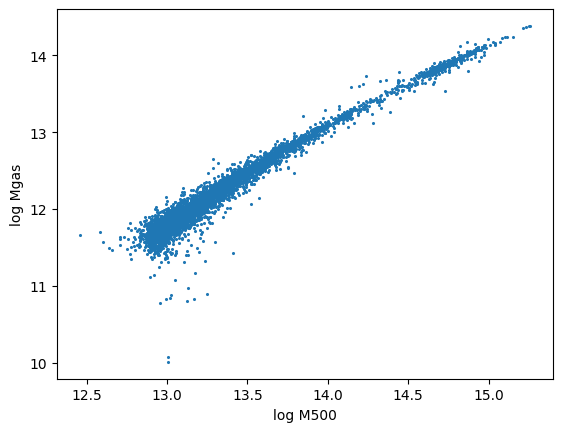

In [5]:
plt.scatter(x,y,s=1.5)
plt.xlabel('log M500')
plt.ylabel('log Mgas')

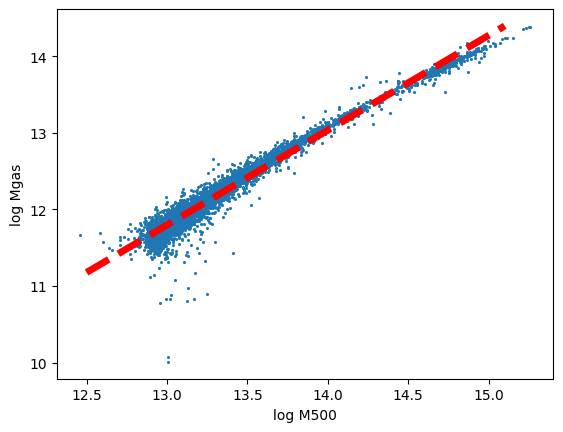

In [6]:
# linear fitting 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x[:,None],y[:,None])
x_sample = np.linspace(12.5,15.1,100)
y_sample = model.predict(x_sample[:,None])
plt.scatter(x,y,s=1.5)
plt.plot(x_sample,y_sample,'r--',lw=5)
plt.xlabel('log M500')
plt.ylabel('log Mgas')
plt.show()


# Understanding tree models

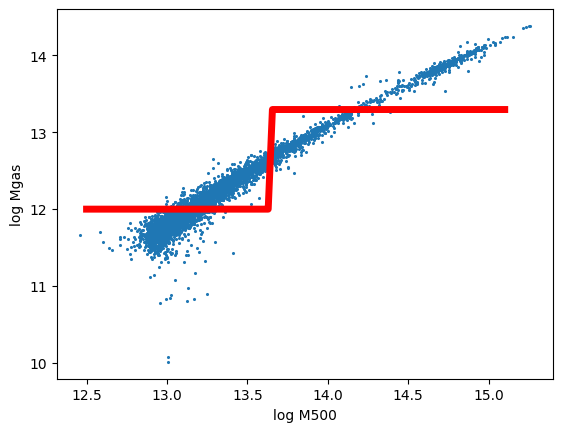

In [7]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0,max_depth=1, min_samples_split=100, min_samples_leaf=1)
model.fit(x[:,None],y[:,None])
x_sample = np.linspace(12.5,15.1,100)
y_sample = model.predict(x_sample[:,None])
plt.scatter(x,y,s=1.5)
plt.plot(x_sample,y_sample,color='red',lw=5)
plt.xlabel('log M500')
plt.ylabel('log Mgas')
plt.show()

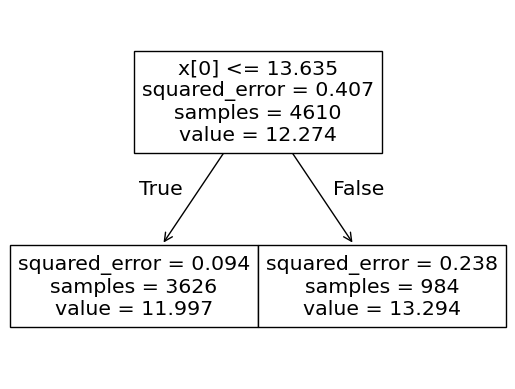

In [8]:
sklearn.tree.plot_tree(model)
plt.show()

# Problem 1: Validate the tree model, and find the best hyperparameters given the dataset.
Basically, the tree model overfits if max_depth=100. For that we need a training set and a validation/test set.  Find the best max_depth of the tree.

* Create a training and test set
* train the model with a grid of max_depth
* find the best max_depth

In [9]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Write here your response.
X_train = None
y_train = None

X_test = None
y_test = None


# Random forest
Randomly sample and fit several trees, to correct for the wigling, a very stable model with not so many hyperparameters (no degeneracy in the parameters). It is arguably the most popular ML model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100,  max_depth=None, random_state=0,)

model.fit(X_train, y_train)
x_sample = np.linspace(12.5,15.1,100)
y_sample = model.predict(x_sample[:,None])
plt.scatter(x,y,s=1.5)
plt.plot(x_sample,y_sample,color='red',lw=5)
plt.xlabel('log M500')
plt.ylabel('log Mstar')
plt.show()

MSE_train = mean_squared_error(y_train, model.predict(X_train))
MSE_test = mean_squared_error(y_test, model.predict(X_test))

print('MSE_train = ',MSE_train)
print('MSE_test = ',MSE_test)

# Problem 2: Feature importance and selection
The main advantage of ML models is that they can find non-linear mappings between high dimensional manifolds. One example can be the face of a person and a feeling (happy, sad, etc). So we should be complicating our problem and stop killing flies with cannons. 

* Create a list of the input features that you want from the database.
* train the model
* compute the mean impurity decrease feature importance
* compute the permutation feature importance

In [ ]:
new_inputs=['all the inputs you want in a list']
output = 'Mgas(80)'

In [ ]:
X = np.log10(df[new_inputs].values)
y = np.log10(df[output].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


model = RandomForestRegressor(n_estimators=100,  max_depth=None, random_state=500,)
model.fit(X_train, y_train)

MSE_train = mean_squared_error(y_train, model.predict(X_train))
MSE_test = mean_squared_error(y_test, model.predict(X_test))

print('MSE_train = ',MSE_train)
print('MSE_test = ',MSE_test)

the model improves ~10%, so it seems there are second order variables that contribute to the mapping.

## Impurity importance.

Use the method function ``model.feature_importances_`` for estimating what features are important unsing the mean decrease impurity criterium. ¿What do you think the method is doing?

```forest_importances = pd.Series(result.importances_mean, index=new_inputs)```

In [24]:
# Write your code here

## Importance based on permutation

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set. Consider the importance of feature based on permutation. Compare the result with the impurity reduction criteria.

```
from sklearn.inspection import permutation_importance


result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=new_inputs)
```



# problem 3: What about deleting the most important feature?

* Delete the mass, e.g. `M_500` from the list of inputs.
* retrain the model
* compute the feature importance
* discuss the results

It is likely the mass is the most important feature with ~80% of the importance. However, we can exclude the mass from the input dataset and then compute the feature importance again. Discuss the results.

# Play around.
* Repeat analyses for the rest of the baryonic properties
* Include new models such as neural networks. **https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html**